In [1]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [6]:
df_southwest = df_southwest.set_index(['date'])

# Holt-Winters

## Training and test set

In [7]:
X = df_southwest['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]
test_set.tail(10)

date
2019-03-01    14438509
2019-04-01    13738590
2019-05-01    14419619
2019-06-01    14410395
2019-07-01    14683468
2019-08-01    13816472
2019-09-01    12598226
2019-10-01    14008397
2019-11-01    13052868
2019-12-01    14140057
Name: pax_count, dtype: int64

In [8]:
training_set.tail(10)

date
2015-10-01    12527345
2015-11-01    12141358
2015-12-01    12371034
2016-01-01    10924106
2016-02-01    10590896
2016-03-01    13113439
2016-04-01    12606212
2016-05-01    13248940
2016-06-01    13624009
2016-07-01    13630005
Name: pax_count, dtype: int64

<AxesSubplot:xlabel='date'>

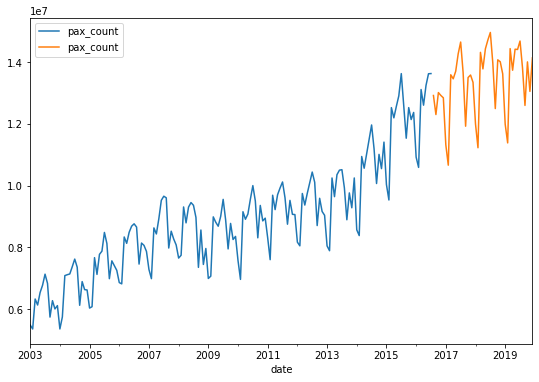

In [9]:
training_set.plot(figsize = (9,6), legend = True)
test_set.plot(legend = True)

### Model

#### Multiplicative

In [10]:
fitted_model_mul = ExponentialSmoothing(training_set,
                             trend= 'mul',
                             seasonal = 'mul',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#### Additiv

In [11]:
fitted_model_add = ExponentialSmoothing(training_set,
                             trend= 'add',
                             seasonal = 'add',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [12]:
print(fitted_model_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 10055904164693.977
Optimized:                         True   AIC                           4081.805
Trend:                   Multiplicative   BIC                           4131.305
Seasonal:                Multiplicative   AICC                          4086.555
Seasonal Periods:                    12   Date:                 Sat, 26 Nov 2022
Box-Cox:                          False   Time:                         17:29:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4646429                alpha                 True
smoothing_trend          

In [13]:
print(fitted_model_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 10880098560306.303
Optimized:                         True   AIC                           4094.646
Trend:                         Additive   BIC                           4144.146
Seasonal:                      Additive   AICC                          4099.396
Seasonal Periods:                    12   Date:                 Sat, 26 Nov 2022
Box-Cox:                          False   Time:                         17:29:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4646429                alpha                 True
smoothing_trend          

### Predictions 

In [14]:
predictions_hw_mul = fitted_model_mul.forecast(steps = len(test_set)).rename("Holt-Winters")

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [15]:
predictions_hw_mul.tail()

2019-08-01    1.566194e+07
2019-09-01    1.402037e+07
2019-10-01    1.531222e+07
2019-11-01    1.462051e+07
2019-12-01    1.507985e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [16]:
predictions_hw_add = fitted_model_add.forecast(steps = len(test_set)).rename("Holt-Winters")

In [17]:
predictions_hw_add.head()

2016-08-01    1.290615e+07
2016-09-01    1.184415e+07
2016-10-01    1.279195e+07
2016-11-01    1.233713e+07
2016-12-01    1.273627e+07
Freq: MS, Name: Holt-Winters, dtype: float64

### Visualization

<AxesSubplot:xlabel='date'>

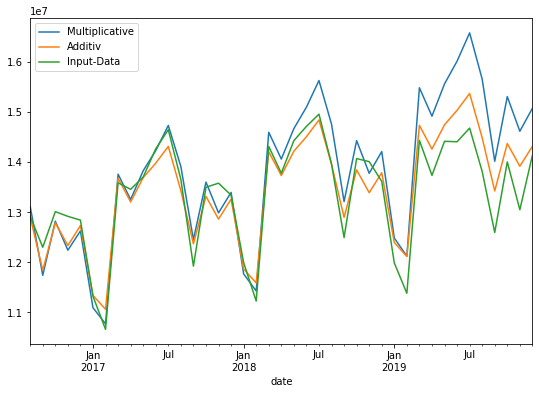

In [18]:
predictions_hw_mul.plot(legend = True, label = 'Multiplicative', figsize = (9,6))
predictions_hw_add.plot(legend = True, label = 'Additiv')
test_set.plot(legend = True, label = 'Input-Data')

### Model assessment

#### MAE and RMSE

In [19]:
print(round(mean_absolute_error(test_set, predictions_hw_mul),2))


598645.2


In [20]:
print(round(mean_absolute_error(test_set, predictions_hw_add),2))

330983.15


In [21]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_mul)), 2))

791100.92


In [22]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_add)), 2))

408725.73


#### MAPE function

In [23]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [24]:
round(MAPE(test_set, predictions_hw_mul),2)

4.43

In [25]:
round(MAPE(test_set, predictions_hw_add),2)

2.51

### Export Forecast

In [26]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest


In [27]:
predictions_hw_mul.to_csv('predictions_hw_mul.csv', index = True)

In [28]:
predictions_hw_add.to_csv('predictions_hw_add.csv', index = True)